In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os

from google.colab import drive
from pathlib import Path
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Studies/Self_Study/Youtube/ML_Siddhardhan/1.Medical_Insurance_Cost_Prediction/insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Median for age, bmi, children and charges
median_age = df['age'].median()
median_bmi = df['bmi'].median()
median_children = df['children'].median()
median_charges = df['charges'].median()

In [ ]:
print(median_age)

39.0


In [ ]:
print(median_bmi)

30.4


In [ ]:
print(median_children)

1.0


In [ ]:
print(median_charges)

9382.033


In [ ]:
# 1. What is the average charge for smokers and non-smokers?

avg_charges_smoker = df[df['smoker'] == 'yes']['charges'].mean() # Here we calculate the means for single variable at a time
avg_charges_nonsmoker = df[df['smoker'] == 'no']['charges'].mean()

In [ ]:
avg_charges_smoker_nonsmoker = df.groupby('smoker')['charges'].mean() # Here we calculate using groupby

In [ ]:
avg_charges_smoker_nonsmoker

,charges
smoker,
no,8434.268298
yes,32050.231832


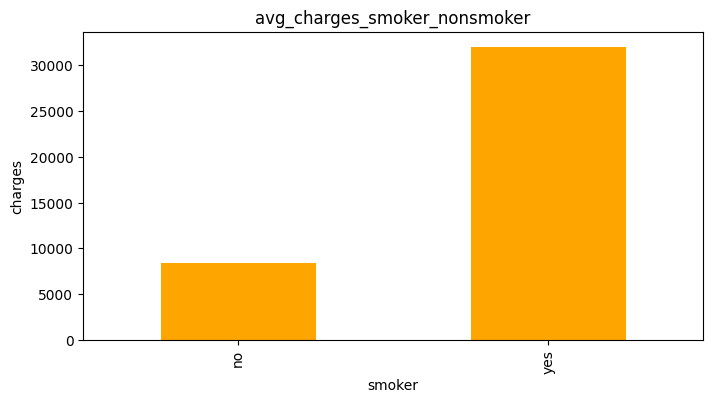

In [ ]:
plt.figure(figsize=(8,4))
avg_charges_smoker_nonsmoker.plot(kind = 'bar', color='orange')
plt.title('avg_charges_smoker_nonsmoker')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 2. How does BMI correlate with charges?

corr = df['bmi'].corr(df['charges'])

In [ ]:
corr

0.19834096883362895

In [ ]:
# 3. What is the average age of people in each region?

avg_age_by_region = df.groupby('region')['age'].mean()

In [ ]:
print(avg_age_by_region)

region
northeast    39.268519
northwest    39.196923
southeast    38.939560
southwest    39.455385
Name: age, dtype: float64


In [ ]:
#4. What is the total number of people with children versus without children?

df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
#5. What is the distribution of charges across different BMI categories (e.g., underweight, normal weight, overweight, obese)?

def categorize_bmi(bmi):
  if bmi < 18.5:
    return 'underweight'
  elif 18.5 <= bmi <= 24.9:
    return 'normal weight'
  elif 25 <= bmi <= 29.9:
    return 'overweight'
  else:
    return 'obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi) # applying funciton to the newly created column bmi_category
bmi_charge_distribution = df.groupby('bmi_category')['charges'].describe()

In [ ]:
bmi_charge_distribution

,count,mean,std,min,25%,50%,75%,max
bmi_category,,,,,,,,
normal weight,222.0,10379.499732,7500.713471,1121.8739,4057.701137,8604.153525,15197.264325,35069.37452
obese,719.0,15479.549773,14487.163396,1131.5066,5143.404650,9880.068000,20068.166695,63770.42801
overweight,377.0,10993.994037,8006.507563,1252.4070,4687.797000,8703.456000,15518.180250,38245.59327
underweight,20.0,8852.200585,7735.038364,1621.3402,2751.631438,6759.262475,12923.162737,32734.18630


In [ ]:
# 6. What is the average charge for each sex?

avg_charges_sex = df.groupby('sex')['charges'].mean()

In [ ]:
avg_charges_sex

,charges
sex,
female,12569.578844
male,13956.751178


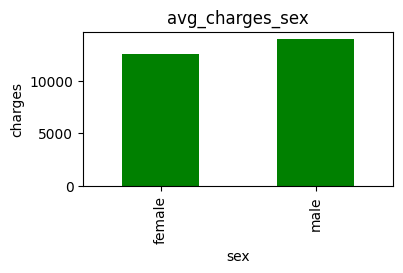

In [ ]:
plt.figure(figsize=(4,2))
avg_charges_sex.plot(kind = 'bar', color='green')
plt.title('avg_charges_sex')
plt.xlabel('sex')
plt.ylabel('charges')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 7. Is there a relationship between the number of children and the charges?

children_charges_corr = df['children'].corr(df['charges'])

In [ ]:
children_charges_corr # We can see there is no relation

0.0679982268479048

In [ ]:
#8. What is the average charge for each smoking status by region?

avg_charges_smoking_region = df.groupby(['sex', 'region'])['charges'].mean().reset_index() # groupby using two variables

In [ ]:
avg_charges_smoking_region

,sex,region,charges
0,female,northeast,12953.203151
1,female,northwest,12479.870397
2,female,southeast,13499.669243
3,female,southwest,11274.411264
4,male,northeast,13854.005374
5,male,northwest,12354.119575
6,male,southeast,15879.617173
7,male,southwest,13412.883576


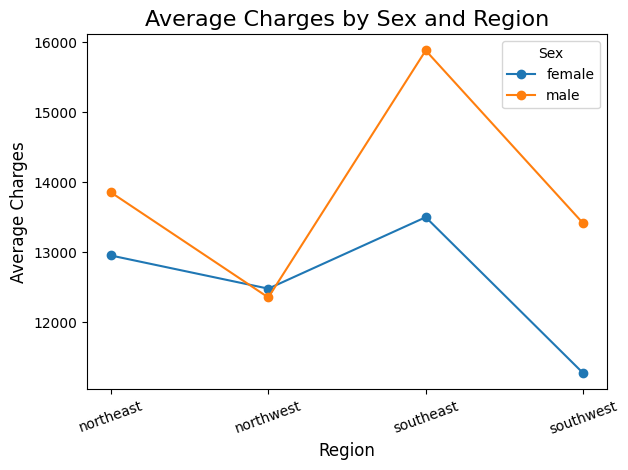

In [ ]:
for sex in avg_charges_smoking_region['sex'].unique():            # loop around the two unique values
    data = avg_charges_smoking_region[avg_charges_smoking_region['sex'] == sex]
    plt.plot(data['region'], data['charges'], marker='o', label=sex)

# Add labels and title
plt.title('Average Charges by Sex and Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Charges', fontsize=12)

# Add legend
plt.legend(title='Sex')

# Rotate x-axis labels for better readability
plt.xticks(rotation=20)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#9. What is the standard deviation of charges based on the smoking status?

std_smoking_status = df.groupby('smoker')['charges'].std()

In [ ]:
std_smoking_status

,charges
smoker,
no,5993.781819
yes,11541.547176


In [ ]:
# 10.What is the median BMI across all regions?

median_bmi_regions = df.groupby('region')['bmi'].median()

In [ ]:
median_bmi_regions

,bmi
region,
northeast,28.88
northwest,28.88
southeast,33.33
southwest,30.30


In [ ]:
# 11. What is the proportion of smokers to non-smokers in the dataset?

smoker_proportion = df['smoker'].value_counts(normalize=True) # we did not use group by here as we are not using any aggregate functions

In [ ]:
smoker_proportion

,proportion
smoker,
no,0.795217
yes,0.204783


In [ ]:
# 12. Which region has the highest average charges?

avg_charges_region = df.groupby('region')['charges'].mean()

In [ ]:
print(avg_charges_region)

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [ ]:
# 13. What is the maximum charge for each region?

max_charges_region = df.groupby('region')['charges'].max()

In [ ]:
max_charges_region

,charges
region,
northeast,58571.07448
northwest,60021.39897
southeast,63770.42801
southwest,52590.82939


In [ ]:
# 14. Does being a smoker impact charges differently based on gender?

smoker_charges_gender = df.groupby(['smoker', 'sex'])['charges'].mean()
''' Here we did not create a separete table of just smoker because we know we are calculating based on both sex and smoker
also groupby handles both categories YES and NO at the same time'''
# if we had to just know about smokers then filtering would have worked

' Here we did not create a separete table of just smoker because we know we are calculating based on both sex and smoker\nalso groupby handles both categories YES and NO at the same time'

In [ ]:
smoker_charges_gender

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

In [ ]:
# 15. What is the correlation between age and BMI?

age_bmi_corr = df['age'].corr(df['bmi'])

In [ ]:
age_bmi_corr

0.1092718815485352

In [ ]:
# 16. Which region has the lowest proportion of smokers?

smoker_region_proportion = df.groupby(['sex', 'region']).value_counts(normalize=True)

''' This does not work directly as groupby is used for agg functions within groups rather than proportions across multiple groups'''

' This does not work directly as groupby is used for agg functions within groups rather than proportions across multiple groups'

In [ ]:
smoker_region_pecentage = df[df['smoker'] == 'yes']['region'].value_counts(normalize=True)
''' First you need to proportion the groups by sex and then use it'''

' First you need to proportion the groups by sex and then use it'

In [ ]:
smoker_region_pecentage

,proportion
region,
southeast,0.332117
northeast,0.244526
southwest,0.211679
northwest,0.211679


In [ ]:
# 17. What is the variance in charges across all regions?

variance_charges_regions = df.groupby('region')['charges'].var()

In [ ]:
variance_charges_regions

,charges
region,
northeast,1.266931e+08
northwest,1.225953e+08
southeast,1.951916e+08
southwest,1.335684e+08


In [ ]:
# 18. What is the most common BMI range (underweight, normal weight, overweight, obese) for smokers?

most_common_bmi_smokers = df[df['smoker'] == 'yes']['bmi_category'].mode()[0]

In [ ]:
most_common_bmi_smokers

'obese'

In [ ]:
# 19. What is the age group (e.g., <20, 20–40, 40–60, 60+) with the highest average charges?

def age_group(age):
  if age < 20:
    return '<20'
  elif 20 <= age <= 40:
    return '20–40'
  elif 40 <= age <= 60:
    return '40–60'
  else:
    return '60+'

In [ ]:
df['age_group'] = df['age'].apply(age_group)
age_group_highest_charges = df.groupby('age_group')['charges'].mean()

In [ ]:
age_group_highest_charges

,charges
age_group,
20–40,10659.589696
40–60,15888.757668
60+,21063.163398
<20,8407.349242


In [ ]:
# 20. How does the median charge compare across age groups?
median_charges_age_group = df.groupby('age_group')['charges'].median()

In [ ]:
median_charges_age_group

,charges
age_group,
20–40,5259.4887
40–60,11071.8555
60+,14394.5579
<20,2138.0707


In [ ]:
# 21. Is there a significant difference in average charges between people with and without children?

avg_charge_child = df[df['children'] > 0]['charges'].mean()
avg_charge_no_child = df[df['children'] == 0]['charges'].mean()

In [ ]:
avg_charge_child

13949.941093481675

In [ ]:
avg_charge_no_child

12365.97560163589

In [ ]:
# 22. What is the average BMI for smokers versus non-smokers?

avg_bmi_smo_nonsmoker = df.groupby('smoker')['bmi'].mean()

In [ ]:
avg_bmi_smo_nonsmoker

,bmi
smoker,
no,30.651795
yes,30.708449


In [ ]:
# 23. How does the presence of children affect BMI distribution?

children_bmi_dist = df.groupby('children')['bmi'].describe()

In [ ]:
children_bmi_dist

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.550296,6.039106,15.960,26.14375,30.3025,34.74625,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.0150,34.23750,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.6400,35.35750,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.32000,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.66000,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.05500,46.75


In [ ]:
# 24. Are charges higher for a particular gender within each region?

charges_gender_region = df.groupby(['sex', 'region'])['charges'].mean()

In [ ]:
charges_gender_region

sex     region   
female  northeast    12953.203151
        northwest    12479.870397
        southeast    13499.669243
        southwest    11274.411264
male    northeast    13854.005374
        northwest    12354.119575
        southeast    15879.617173
        southwest    13412.883576
Name: charges, dtype: float64

In [ ]:
# 25. What is the average charge for individuals with BMI > 30 and are smokers?

# a.
avg_chages_smoker_bmi_greater_30 = df.groupby(['smoker', 'bmi_category'])['charges'].mean()
avg_chages_smoker_bmi_greater_30

smoker  bmi_category 
no      normal weight     7599.638131
        obese             8829.516651
        overweight        8306.378031
        underweight       5532.992453
yes     normal weight    19942.223641
        obese            41355.869131
        overweight       22379.034063
        underweight      18809.824980
Name: charges, dtype: float64

In [ ]:
#b.
avg_obese_smoker = df[(df['bmi'] > 30) & (df['smoker'] == 'yes')]['charges'].mean() # When using two or more than two variables you can use & in ()
avg_obese_smoker

41692.80899152778

In [ ]:
# 26. What is the most common age among non-smokers with no children?

most_common_age = df[(df['smoker'] == 'no') & (df['children'] == 0)].mode()
most_common_age

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group
0,18.0,female,25.08,0.0,no,northeast,1639.5631,obese,40–60
1,NaN,NaN,34.10,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 27. Which region has the widest range of charges (max - min)?

charge_range_by_region = df.groupby('region')['charges'].apply(lambda x: x.max() - x.min()).idxmax()
charge_range_by_region

'southeast'